<a href="https://colab.research.google.com/github/diss03/Time-series/blob/task_1/%D0%A1%D1%82%D0%B0%D1%86%D0%B8%D0%BE%D0%BD%D0%B0%D1%80%D0%B8%D0%B7%D0%B0%D1%86%D0%B8%D1%8F_%D1%80%D1%8F%D0%B4%D0%BE%D0%B2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
import statsmodels.tsa.api as smt
import matplotlib.pyplot as plt
from scipy.stats import boxcox
%matplotlib inline

In [ ]:
!git clone https://github.com/diss03/Time-series.git

Cloning into 'Time-series'...
remote: Enumerating objects: 22, done.
remote: Counting objects: 100% (22/22), done.
remote: Compressing objects: 100% (19/19), done.
remote: Total 22 (delta 4), reused 12 (delta 1), pack-reused 0 (from 0)
Receiving objects: 100% (22/22), 614.40 KiB | 9.31 MiB/s, done.
Resolving deltas: 100% (4/4), done.


In [ ]:
sales_of_company_x = pd.read_csv("/content/Time-series/Заняние 1/Series/monthly-sales-of-company-x-jan-6.csv")
robberies_in_boston = pd.read_csv("/content/Time-series/Заняние 1/Series/monthly-boston-armed-robberies-j.csv")
airlines_passengers = pd.read_csv("/content/Time-series/Заняние 1/Series/international-airline-passengers.csv")
mean_monthly_temp = pd.read_csv("/content/Time-series/Заняние 1/Series/mean-monthly-air-temperature-deg.csv")
dowjones_closing = pd.read_csv("/content/Time-series/Заняние 1/Series/weekly-closings-of-the-dowjones-.csv")
female_births = pd.read_csv("/content/Time-series/Заняние 1/Series/daily-total-female-births-in-cal.csv")

In [ ]:
def test_stationarity(timeseries):
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for [key, value] in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)

In [ ]:
def tsplot(y, lags=None, figsize=(14, 8), style='bmh'):
    test_stationarity(y)
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
    with plt.style.context(style):
        plt.figure(figsize=figsize)
        layout = (4, 1)
        ts_ax = plt.subplot2grid(layout, (0, 0), rowspan=2)
        acf_ax = plt.subplot2grid(layout, (2, 0))
        pacf_ax = plt.subplot2grid(layout, (3, 0))

        y.plot(ax=ts_ax, color='blue', label='Or')
        ts_ax.set_title('Original')

        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax, alpha=0.05)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax, alpha=0.05)

        plt.tight_layout()
    return

In [ ]:
all_series = {
    "Monthly sales of company X": sales_of_company_x["Count"],
    "Monthly Boston armed robberies": robberies_in_boston["Count"],
    "International airline passengers: monthly totals in thousands": airlines_passengers["Count"],
    "Mean monthly air temperature (Deg. F) Nottingham Castle": mean_monthly_temp["Deg"],
    "Weekly closings of the Dow-Jones industrial average": dowjones_closing["Close"],
    "Daily total female births in California": female_births["Count"]
}

Results of Dickey-Fuller Test:
Test Statistic                  0.654715
p-value                         0.988889
#Lags Used                     12.000000
Number of Observations Used    64.000000
Critical Value (1%)            -3.536928
Critical Value (5%)            -2.907887
Critical Value (10%)           -2.591493
dtype: float64


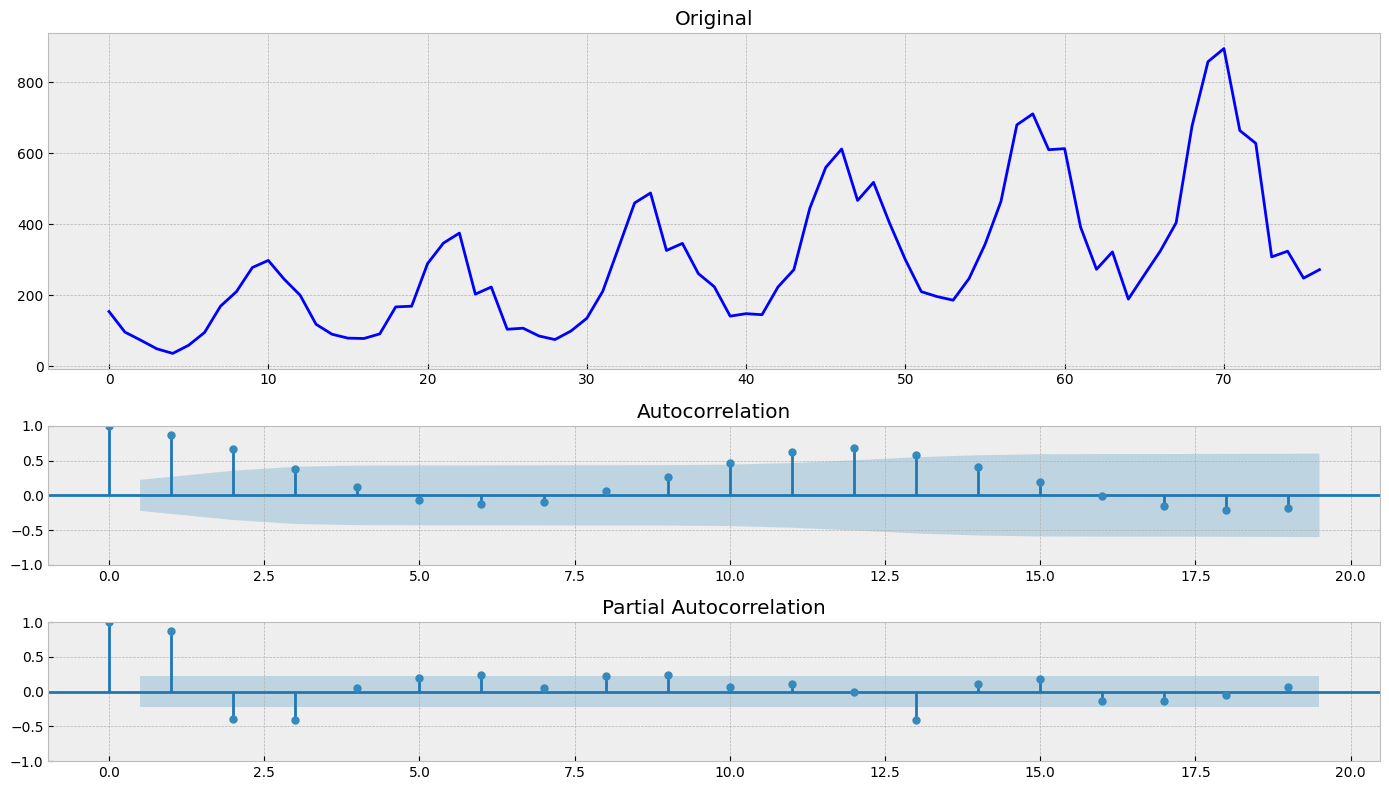

In [35]:
tsplot(all_series["Monthly sales of company X"])

In [42]:
series = boxcox(all_series["Monthly sales of company X"], 0)

Results of Dickey-Fuller Test:
Test Statistic                 -0.908049
p-value                         0.785310
#Lags Used                     12.000000
Number of Observations Used    64.000000
Critical Value (1%)            -3.536928
Critical Value (5%)            -2.907887
Critical Value (10%)           -2.591493
dtype: float64


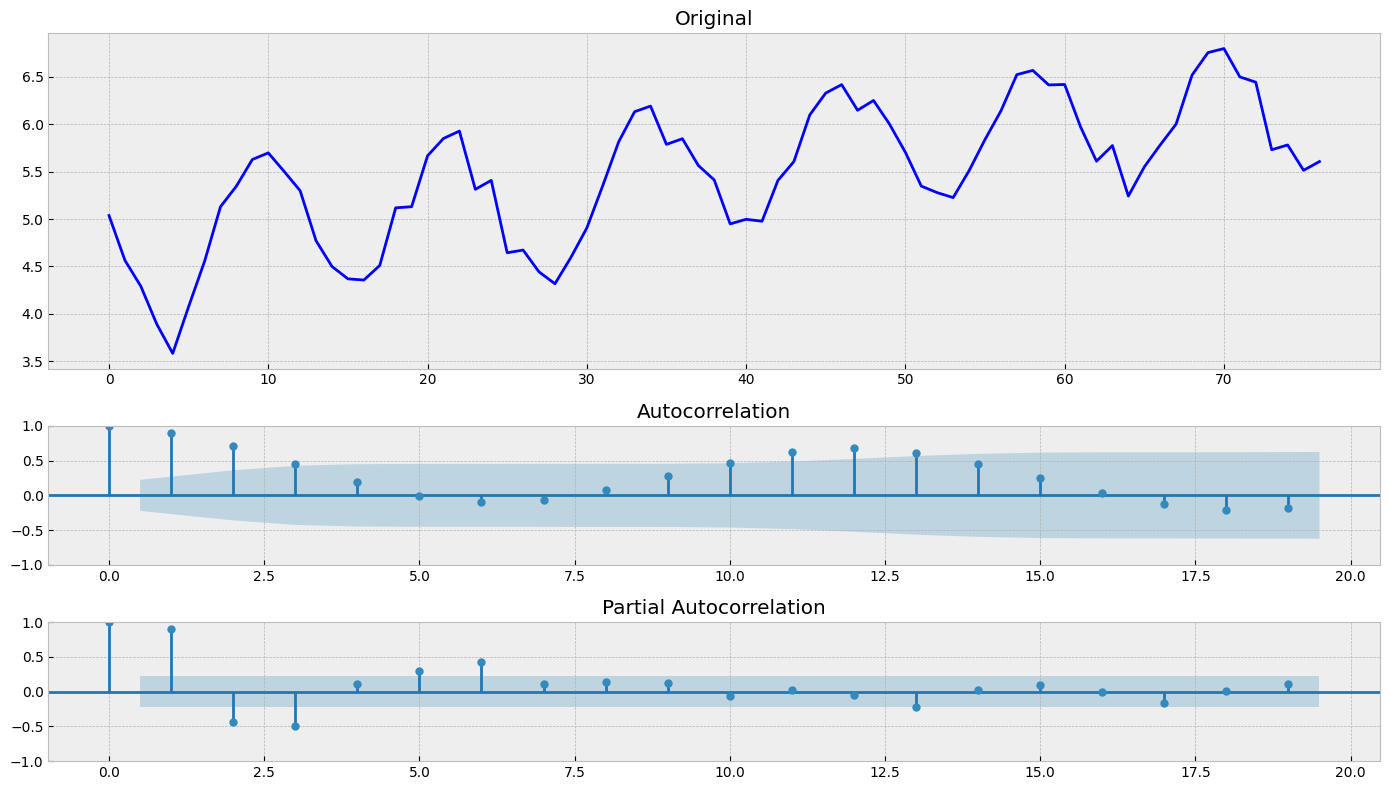

In [43]:
tsplot(series)

In [44]:
series = series[1:] - series[:-1] # неоптимизированное использование

In [48]:
series = boxcox(all_series["Monthly sales of company X"], 0)
series = np.diff(series, 1)

Results of Dickey-Fuller Test:
Test Statistic                 -3.135644
p-value                         0.024025
#Lags Used                     11.000000
Number of Observations Used    64.000000
Critical Value (1%)            -3.536928
Critical Value (5%)            -2.907887
Critical Value (10%)           -2.591493
dtype: float64


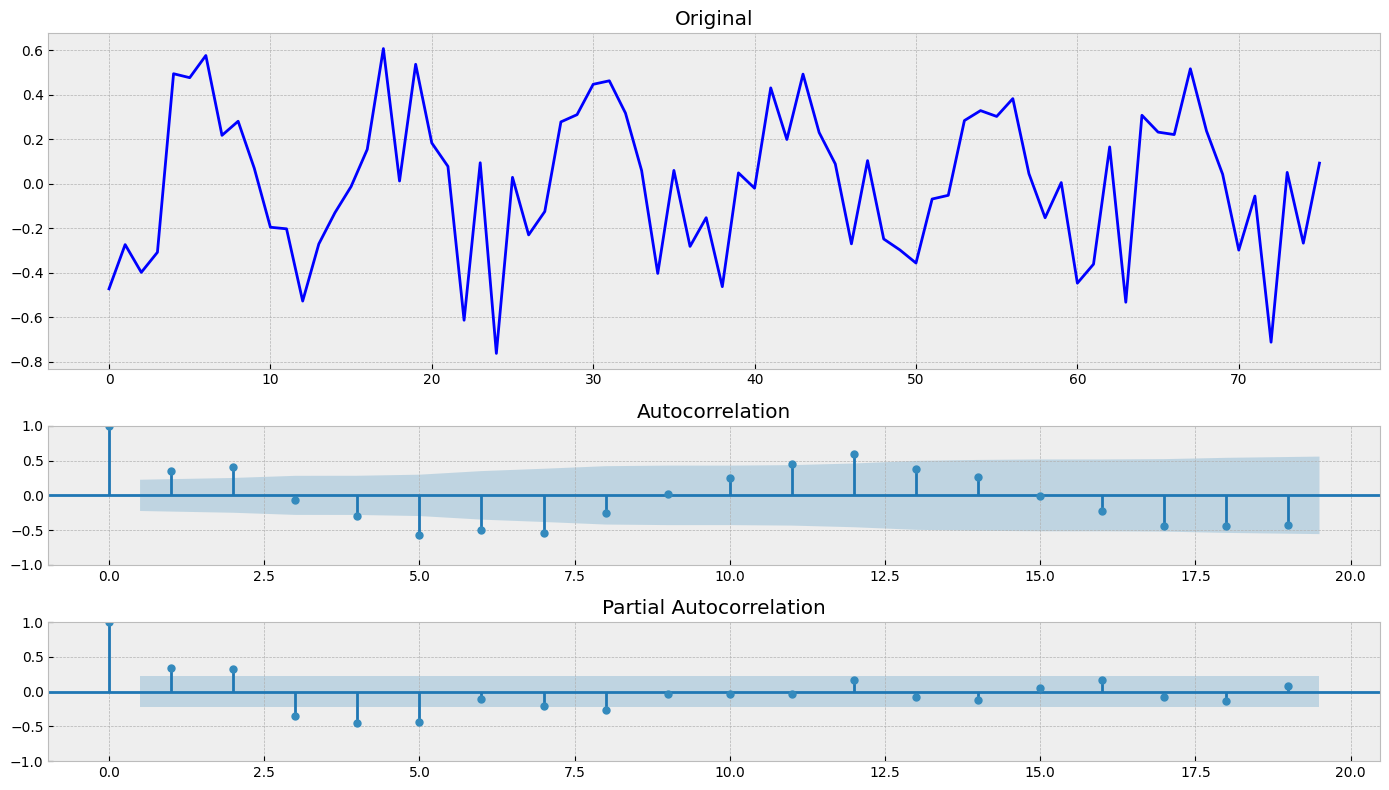

In [45]:
tsplot(series)

In [53]:
series = boxcox(all_series["Monthly sales of company X"], 0)
# series = np.diff(series, 1)
series = np.diff(series, 12)

Results of Dickey-Fuller Test:
Test Statistic                -7.633549e+00
p-value                        1.979614e-11
#Lags Used                     1.100000e+01
Number of Observations Used    5.300000e+01
Critical Value (1%)           -3.560242e+00
Critical Value (5%)           -2.917850e+00
Critical Value (10%)          -2.596796e+00
dtype: float64


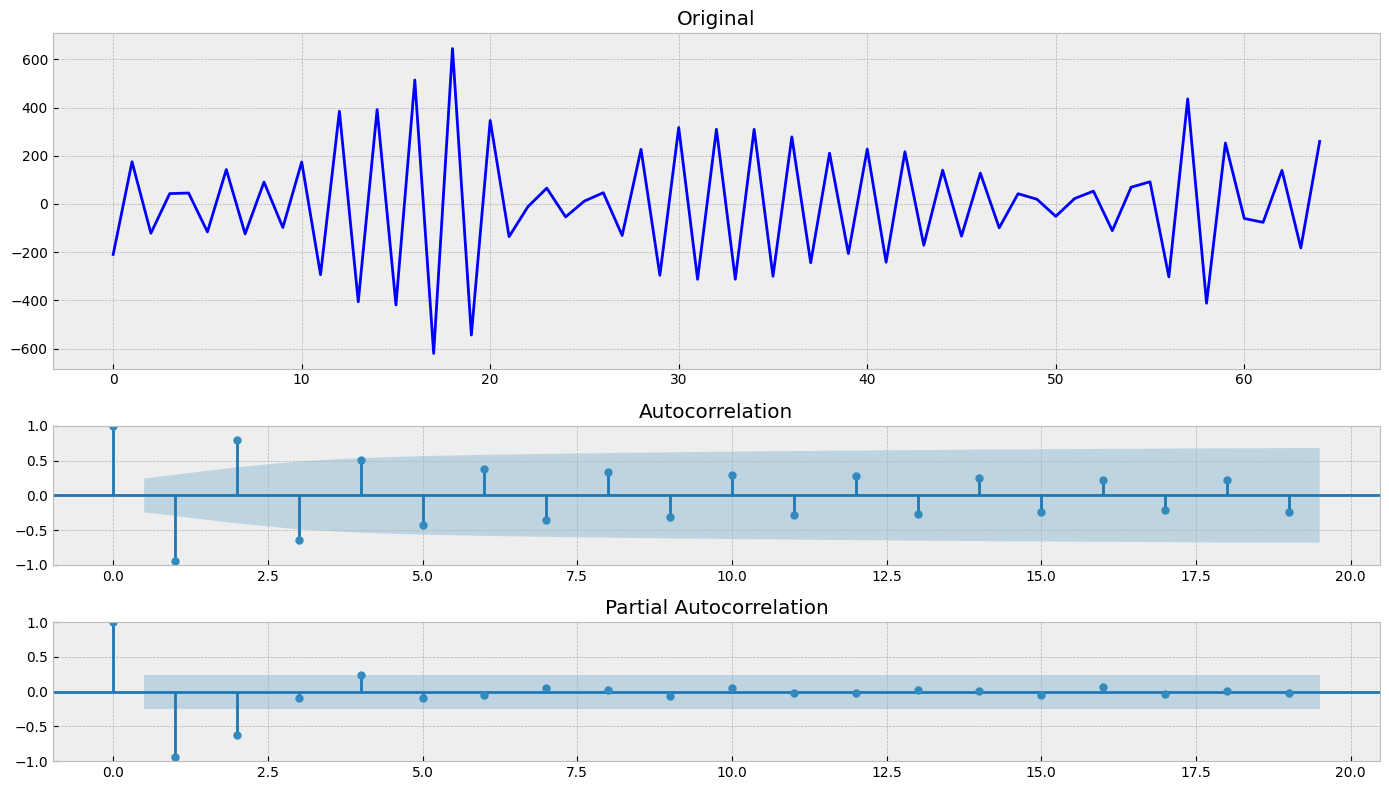

In [54]:
tsplot(series)